<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/Slinky%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Point Mass Modeling (Vertical Situation)

In [3]:
# Constant Initialization

N = 10                    # of point mass
omega = 2 * np.pi * 10   # w**2 := k/m, Hz
g = 9.8                   # m/s**2
L_0 = 0.02             # natural length

delta = g / omega ** 2    # stationary length

t_step = 100000
tlist = np.linspace(0,2,t_step)

In [4]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*L_0])

Y_0 = np.array(lst)

In [5]:
Y_0

array([[-0.        ],
       [-0.04482369],
       [-0.08716501],
       [-0.12702396],
       [-0.16440055],
       [-0.19929476],
       [-0.2317066 ],
       [-0.26163608],
       [-0.28908319],
       [-0.31404793],
       [-0.33653029]])

In [6]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [7]:
A

array([[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, -2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, -2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, -2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -2,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, -2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1]])

In [8]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [9]:
N_crit

8

In [10]:
D

array([-3.91898595e+00, -3.68250707e+00, -3.30972147e+00, -2.83083003e+00,
       -2.28462968e+00, -1.71537032e+00, -1.16916997e+00, -6.90278532e-01,
        4.39245429e-16, -8.10140528e-02, -3.17492934e-01])

In [11]:
P

array([[-6.06832509e-02, -1.20131166e-01, -1.77133557e-01,
        -2.30530019e-01, -2.79233555e-01, -3.22252701e-01,
        -3.58711712e-01, -3.87868386e-01,  3.01511345e-01,
         4.22061281e-01,  4.09129179e-01],
       [ 1.77133557e-01,  3.22252701e-01,  4.09129179e-01,
         4.22061281e-01,  3.58711712e-01,  2.30530019e-01,
         6.06832509e-02, -1.20131166e-01,  3.01511345e-01,
         3.87868386e-01,  2.79233555e-01],
       [-2.79233555e-01, -4.22061281e-01, -3.58711712e-01,
        -1.20131166e-01,  1.77133557e-01,  3.87868386e-01,
         4.09129179e-01,  2.30530019e-01,  3.01511345e-01,
         3.22252701e-01,  6.06832509e-02],
       [ 3.58711712e-01,  3.87868386e-01,  6.06832509e-02,
        -3.22252701e-01, -4.09129179e-01, -1.20131166e-01,
         2.79233555e-01,  4.22061281e-01,  3.01511345e-01,
         2.30530019e-01, -1.77133557e-01],
       [-4.09129179e-01, -2.30530019e-01,  2.79233555e-01,
         3.87868386e-01, -6.06832509e-02, -4.22061281e-01,
  

In [12]:
P_dag

array([[-6.06832509e-02,  1.77133557e-01, -2.79233555e-01,
         3.58711712e-01, -4.09129179e-01,  4.26401433e-01,
        -4.09129179e-01,  3.58711712e-01, -2.79233555e-01,
         1.77133557e-01, -6.06832509e-02],
       [-1.20131166e-01,  3.22252701e-01, -4.22061281e-01,
         3.87868386e-01, -2.30530019e-01, -4.47181304e-15,
         2.30530019e-01, -3.87868386e-01,  4.22061281e-01,
        -3.22252701e-01,  1.20131166e-01],
       [-1.77133557e-01,  4.09129179e-01, -3.58711712e-01,
         6.06832509e-02,  2.79233555e-01, -4.26401433e-01,
         2.79233555e-01,  6.06832509e-02, -3.58711712e-01,
         4.09129179e-01, -1.77133557e-01],
       [-2.30530019e-01,  4.22061281e-01, -1.20131166e-01,
        -3.22252701e-01,  3.87868386e-01,  4.89641465e-16,
        -3.87868386e-01,  3.22252701e-01,  1.20131166e-01,
        -4.22061281e-01,  2.30530019e-01],
       [-2.79233555e-01,  3.58711712e-01,  1.77133557e-01,
        -4.09129179e-01, -6.06832509e-02,  4.26401433e-01,
  

In [13]:
X_0 = np.matmul(P_dag, Y_0)

In [14]:
X_0

array([[-4.22818671e-04],
       [-2.19566594e-03],
       [-1.46139770e-03],
       [-5.48110163e-03],
       [-3.33741963e-03],
       [-1.26442431e-02],
       [-8.37774094e-03],
       [-3.78193602e-02],
       [-6.19820509e-01],
       [ 3.50646345e-01],
       [ 3.51872570e-02]])

In [15]:
X_0[N_crit][0]

-0.6198205086943424

In [16]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * L_0])

  elif i==N:
    lst.append([g + omega**2 * L_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [17]:
G

array([[-69.15683521],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [ 88.75683521]])

In [18]:
H

array([[ 3.73034936e-14],
       [ 1.89703533e+01],
       [-1.42108547e-13],
       [ 3.64038415e+01],
       [-6.03961325e-14],
       [ 5.08881069e+01],
       [ 6.75015599e-14],
       [ 6.12497205e+01],
       [ 3.25029229e+01],
       [-6.66492460e+01],
       [-4.26325641e-14]])

In [19]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [20]:
A_coeff

array([[-4.22818671e-04],
       [-8.90781374e-04],
       [-1.46139770e-03],
       [-2.22368219e-03],
       [-3.33741963e-03],
       [-5.12976770e-03],
       [-8.37774094e-03],
       [-1.53433093e-02],
       [-1.87437046e+13],
       [ 1.42257174e-01],
       [ 3.51872570e-02]])

In [21]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [22]:
X

array([[-4.22818671e-04, -4.22817363e-04, -4.22813438e-04, ...,
         3.54026934e-04,  3.53450748e-04,  3.52872375e-04],
       [-2.19566594e-03, -2.19566335e-03, -2.19565558e-03, ...,
        -6.59564754e-04, -6.58085862e-04, -6.56610731e-04],
       [-1.46139770e-03, -1.46139388e-03, -1.46138243e-03, ...,
         1.09348647e-03,  1.09570011e-03,  1.09790802e-03],
       ...,
       [-6.19820509e-01, -6.19820515e-01, -6.19820535e-01, ...,
        -6.56230662e+01, -6.56243663e+01, -6.56256664e+01],
       [ 3.50646345e-01,  3.50646336e-01,  3.50646308e-01, ...,
         1.58087846e-01,  1.58135445e-01,  1.58183050e-01],
       [ 3.51872570e-02,  3.51872482e-02,  3.51872217e-02, ...,
        -4.20757934e-03, -4.23231485e-03, -4.25704823e-03]])

In [23]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [24]:
Y

array([[-6.93889390e-18, -2.15604284e-08, -8.62416795e-08, ...,
        -1.97155098e+01, -1.97158888e+01, -1.97162677e+01],
       [-4.48236900e-02, -4.48236900e-02, -4.48236900e-02, ...,
        -1.97270886e+01, -1.97274645e+01, -1.97278404e+01],
       [-8.71650110e-02, -8.71650110e-02, -8.71650110e-02, ...,
        -1.97391933e+01, -1.97395738e+01, -1.97399544e+01],
       ...,
       [-2.89083188e-01, -2.89083188e-01, -2.89083188e-01, ...,
        -1.98298089e+01, -1.98302210e+01, -1.98306331e+01],
       [-3.14047926e-01, -3.14047926e-01, -3.14047926e-01, ...,
        -1.98460301e+01, -1.98464469e+01, -1.98468637e+01],
       [-3.36530295e-01, -3.36530295e-01, -3.36530295e-01, ...,
        -1.98645651e+01, -1.98649888e+01, -1.98654125e+01]])

Text(0, 0.5, 'Vertical Postion')

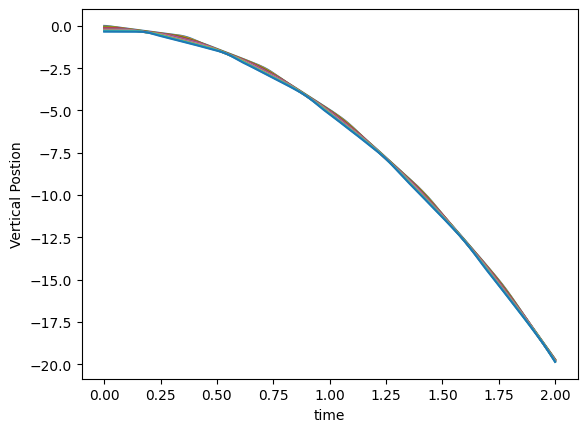

In [25]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position (m)')

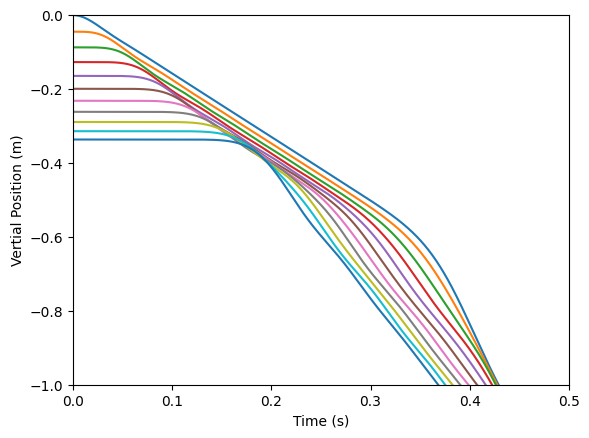

In [26]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0,0.5)
plt.ylim(-1,0)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertial Position (m)')

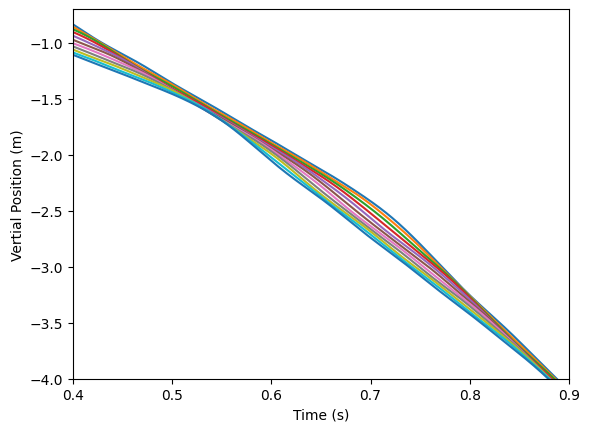

In [27]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0.4,0.9)
plt.ylim(-4,-0.7)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')